# Decision Tree (의사결정 나무)
#### 결정트리는 **지도학습 (Supervised Machine Learning Algorithm)**의 **분류 모델 (Classification)**
* iris 데이터를 이용해 결정트리 실습 진행

In [1]:
library(rpart) # R에서 지원하는 결정트리 패키지
library(rpart.plot) # 결정트리 시각화 패키지z
library(ggplot2)

# **iris 데이터셋** 확인

In [2]:
head(iris)

cat("iris Species 종류: ", levels(iris$Species), "\n")

cat("iris dataset row 개수: ", nrow(iris), "개")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


iris Species 종류:  setosa versicolor virginica 
iris dataset row 개수:  150 개

# Train dataset 학습 진행
* 총 150개의 row를 교차확인: 
  - 150개 중 100개 -> train data (학습 데이터)
  - 150개 중 50개 -> test data (검증 데이터)
* 결정트리 학습에 이용되는 **rpart()** 메소드 활용
* 결정트리 시각화에 이용되는 **rpart.plot()** 메소드 활용

In [3]:
train <- sample(1:150, 100)

# rpart() 메소드를 이용해 결정트리 모델 학습 진행
## Species: 종속변수 (= 분류의 대상)
## Sepal.Length + ... + Petal.Width: Species를 분류할 기준이 되는 칼럼
## method: 해당 결정트리 모델이 '분류(classification)'인지 '회귀(regression)'인지 입력하는 파라미터
tree <- rpart(Species ~
             Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,
             data = iris,
             subset = train,
             method = 'class')

# Summary(Desicion Tree)
* **CP (Complexity parameter)**: 복잡도
* **nsplit**: 분기횟수
   - 분기횟수가 늘어나며 복잡도가 줄어드는 것을 확인
   - CP의 최솟값은 0.01, 이 이하로 줄어들 수 없으므로 더이상의 분기가 불가능하여 분기가 중지됨
* **xerror**: 교차검증에서 발생하는 오류율
* **xstd**: 표준편차
* **Variable importance**
   - 각 변수가 노드를 분기함에 있어 어느정도의 기여를 했는지 확인 가능
* **Node number ~~**
   - 노드별 세부정보 확인 가능 
   - **observations**: 노드에 속한 데이터의 개수
   - **expected loss**: 불순도

In [4]:
summary(tree)

Call:
rpart(formula = Species ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width, data = iris, subset = train, method = "class")
  n= 100 

         CP nsplit  rel error     xerror       xstd
1 0.5151515      0 1.00000000 1.10606061 0.06726658
2 0.4393939      1 0.48484848 0.48484848 0.07067820
3 0.0100000      2 0.04545455 0.07575758 0.03302196

Variable importance
 Petal.Width Petal.Length Sepal.Length  Sepal.Width 
          34           31           22           12 

Node number 1: 100 observations,    complexity param=0.5151515
  predicted class=setosa      expected loss=0.66  P(node) =1
    class counts:    34    34    32
   probabilities: 0.340 0.340 0.320 
  left son=2 (34 obs) right son=3 (66 obs)
  Primary splits:
      Petal.Length < 2.45 to the left,  improve=33.67030, (0 missing)
      Petal.Width  < 0.75 to the left,  improve=33.67030, (0 missing)
      Sepal.Length < 5.45 to the left,  improve=23.40061, (0 missing)
      Sepal.Width  < 3.25 to the right, impr

# **의사결정나무 시각화**
* 결정트리는 분기의 기준점이 되는 **노드 (node)**와 노드를 연결하는 **가지 (Branch)**로 이뤄짐
* 시각화를 통해 결정트리 모델이 어떤 **기준**을 바탕으로 Iris의 Species를 각각 **Setosa, Versicolor, Virginica**로 분류했는지 확인 가능

In [5]:
# 학습된 결정트리 모델 확인
print(tree)

n= 100 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 100 66 setosa (0.34000000 0.34000000 0.32000000)  
  2) Petal.Length< 2.45 34  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 66 32 versicolor (0.00000000 0.51515152 0.48484848)  
    6) Petal.Width< 1.65 35  2 versicolor (0.00000000 0.94285714 0.05714286) *
    7) Petal.Width>=1.65 31  1 virginica (0.00000000 0.03225806 0.96774194) *


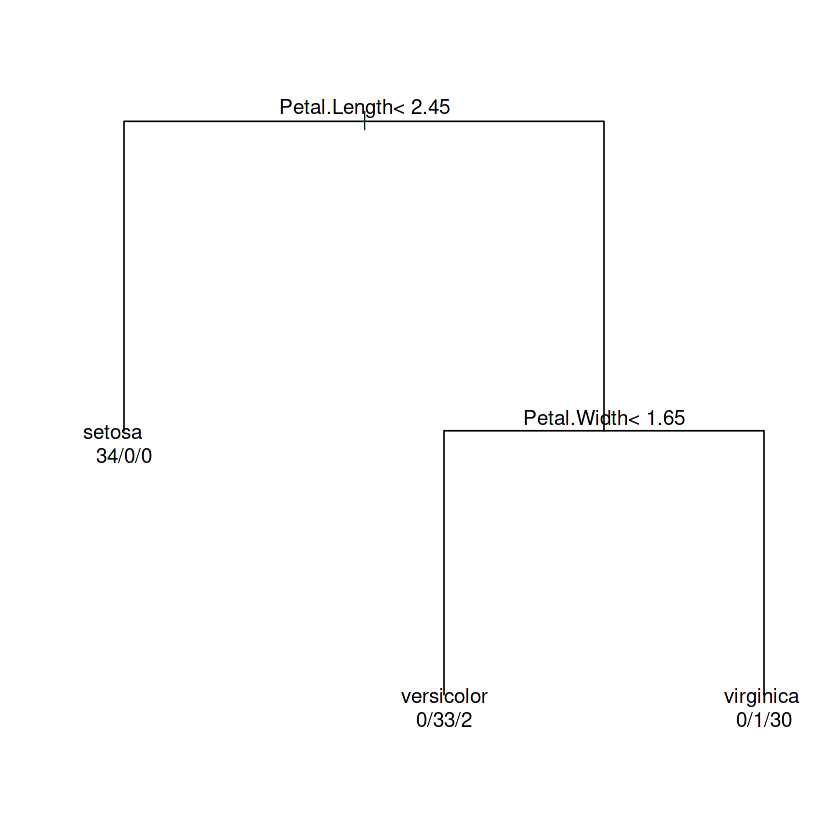

In [6]:
par(mfrow=c(1,1), xpd=NA) # 그래픽 함수, 차트 이미지가 잘리는 걸 방지

# plot(): 기준점을 바탕으로 분기한 결과, setosa/versicolor/virginica로 분류된 개체 수가 각각 몇개인지 표시
plot(tree) 
text(tree, use.n=TRUE)

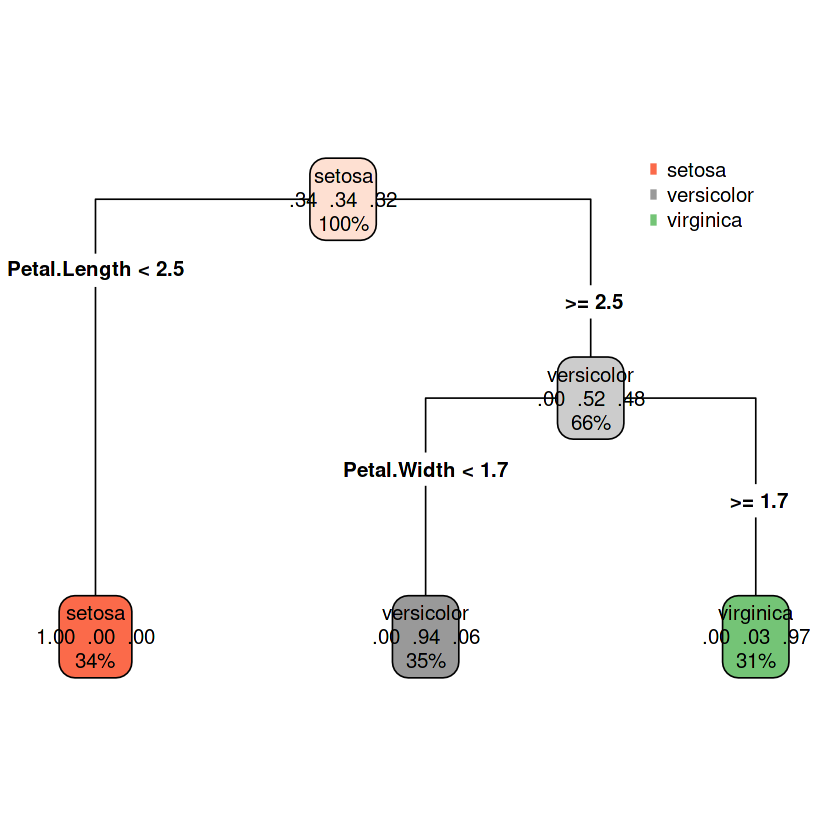

In [7]:
# rpart.plot(): 특정 개체로 분류될 확률을 표시
rpart.plot(tree, type=4) # type: 결정트리 시각화 유형, type을 바꾸면 모양이 바뀜

# **가지치기 (Prunning)**
* **Tree Prunning**: 의사결정 나무 모델의 **과적합 (Overfitting)**을 줄이고, 일반화 가능성을 증대시킬 수 있는 subtree를 찾는 과정
* **가지치기 방법**
  - Cross-validation
  - Independent Validation Set etc.
* **Prunning Logic**
  - 가지치기 과정에서는 트리 해당 데이터셋에 과도하게 최적화되지 않도록 **결정 트리의 최대 깊이를 제한**하고, **Leaf node의 최대 개수를 제한**함
  - 노드를 분화시키기 위해 필요한 **'최소한의 데이터 개수'**를 지정할 수 있음

In [8]:
# printcp(): 학습을 완료한 결정트리의 정보 출력
printcp(tree)


Classification tree:
rpart(formula = Species ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width, data = iris, subset = train, method = "class")

Variables actually used in tree construction:
[1] Petal.Length Petal.Width 

Root node error: 66/100 = 0.66

n= 100 

       CP nsplit rel error   xerror     xstd
1 0.51515      0  1.000000 1.106061 0.067267
2 0.43939      1  0.484848 0.484848 0.070678
3 0.01000      2  0.045455 0.075758 0.033022


In [9]:
# prune(): 가지치기 메소드
# xerror의 최솟값과, 그에 따른 xstd의 값을 더한 수치 (MIN + 1SE)를 기준으로 도출한 CP 값을 바탕으로 가지치기 수행
# 계산 예시: 위 summary() 과정에서 확인한 xerror, xstd 값을 바탕으로, MIN + 1SE = 0.2173..정도일때,
#           xerror가 0.2173...이하로 떨어지는 경우는 CP가 0.0153..~0.3692..에 속함 
#           따라서 대략적으로 CP=0.1을 기준으로 가지치기를 수행

pruned_tree <- prune(tree, cp=0.1)

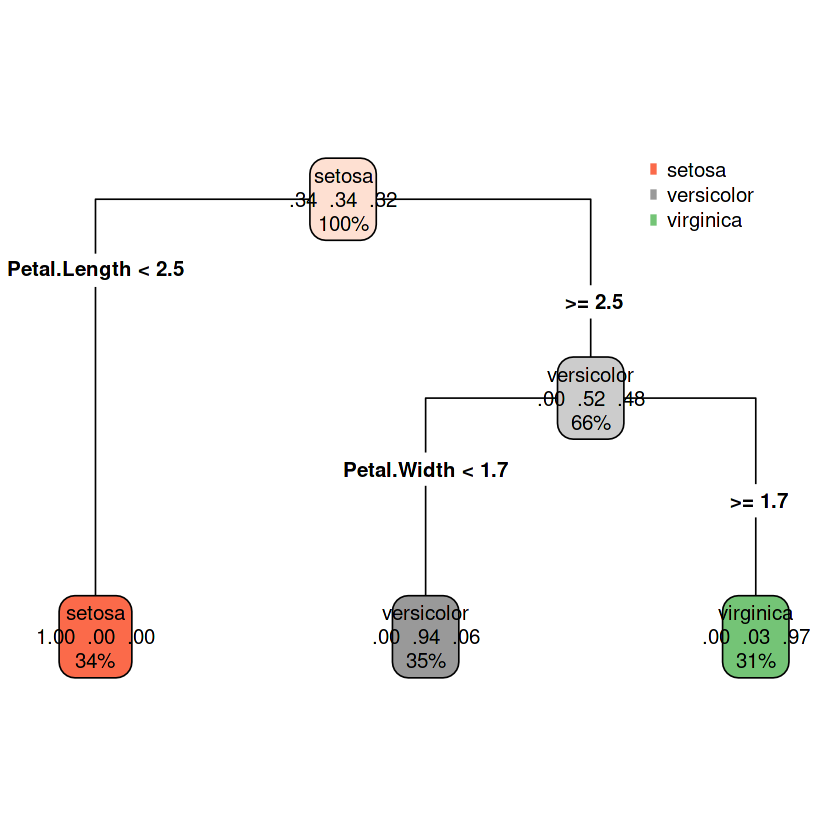

In [10]:
rpart.plot(pruned_tree, type=4)
# 가지치기를 수행해 분기 횟수를 줄일 수 있음

# 학습한 결정트리 모델로 test dataset의 각 개체가 어떤 종류일지 **분류, 예측하기**
* **정오분류표 (Confusion Matrix, 혼동행렬) 작성**: 원본 iris의 Species별 개체 수와, 결정트리 모델을 기반으로 예측한 결과의 Species별 개체 수 확인
* 정분류율과 오분류율 계산

In [11]:
# predict(): 앞서 학습시킨 결정트리 모델을 바탕으로 test data를 분류 및 예측
test <- iris[-train,]

predict_species <- predict(pruned_tree, test, type='class')
predict_species

2         11         16         19         20         22         23 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        27         28         32         35         37         40         42 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        43         44         57         63         68         69         73 
    setosa     setosa versicolor versicolor versicolor versicolor versicolor 
        76         78         83         87         88         89         90 
versicolor  virginica versicolor versicolor versicolor versicolor versicolor 
        93         94         98        100        101        102        103 
versicolor versicolor versicolor versicolor  virginica  virginica  virginica 
       108        111        113        115        116        117        123 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       128        129        131        132        134        135        137 
 virginica  virginica  virginica  virginica versicolor versicolor  virginica 
       146 
 virginica 
Levels: setosa versicolor virginica

In [12]:
# 테이블의 대각선에 위치한 값은 예측 결과가 일치한 개체 수이며, 
# 이외의 값은 분류 결과가 불일치한 경우에 해당!
conf_mat <- table(iris$Species[-train], predict_species)
conf_mat

            predict_species
             setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         15         1
  virginica       0          2        16

In [13]:
# 정분류율 계산
sum(conf_mat[row(conf_mat) == col(conf_mat)]) / sum(conf_mat) 

[1] 0.94

In [14]:
# 오분류율 계산
1 - sum(conf_mat[row(conf_mat) == col(conf_mat)]) / sum(conf_mat) 

[1] 0.06

# **Confusion Matrix 시각화**

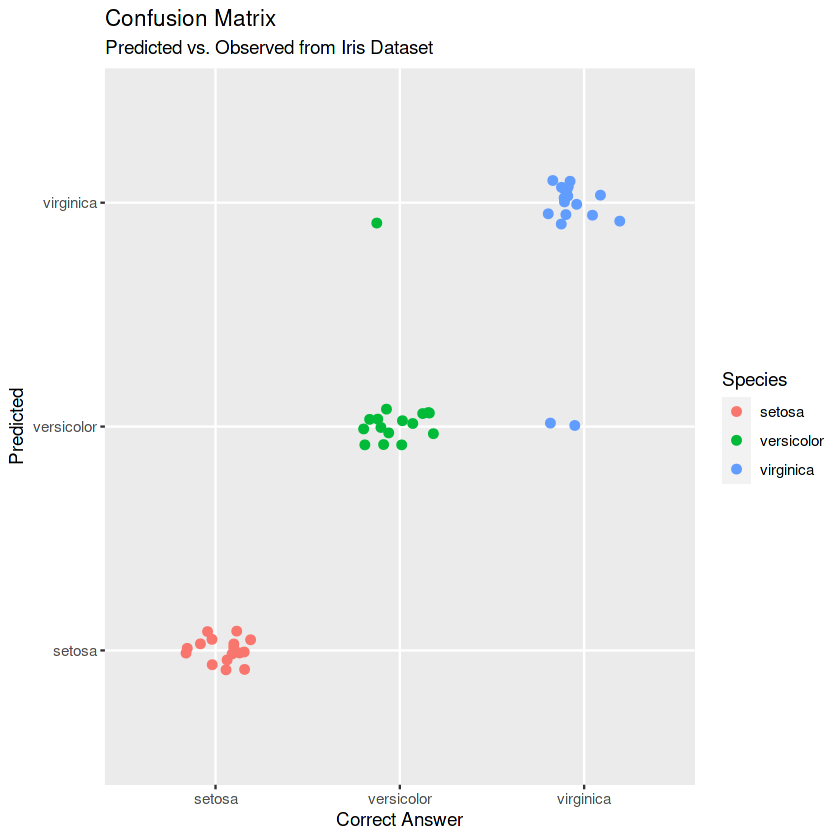

In [15]:
library(ggplot2)

test$pred <- predict_species

ggplot(test, aes(Species, pred, color = Species)) +
    geom_jitter(width=0.2, height=0.1, size=2) +
    labs(title = "Confusion Matrix",
        subtitle="Predicted vs. Observed from Iris Dataset",
        y = "Predicted",
        x = "Correct Answer")